## 0. 准备工作

In [1]:
#导入所需要的工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#导入所需数据
path = r'D:\caoxiaolong\内培\招新笔试题\return_daily.xlsx'
data = pd.read_excel(path)
data.head(10)

,return
2013-04-01,0.013419
2013-04-02,0.002452
2013-04-03,0.000489
2013-04-08,-0.025428
2013-04-09,0.000502
2013-04-10,-0.027081
2013-04-11,0.000515
2013-04-12,-0.026275
2013-04-15,-0.017989
2013-04-16,0.010237


## 1. 计算年化收益率

In [34]:
#Q1: 计算策略的年化收益率
return_array = np.array(data['return'])
temp = return_array + 1

In [35]:
net_value = np.ones(len(temp)+1)
for i in range(1, len(net_value)):
    net_value[i] = np.prod(temp[:i])

In [36]:
annual_return = (net_value[-1] / net_value[0]) ** (250 / len(net_value)) - 1
annual_return

0.25163667048037497

In [37]:
print("策略的年化收益率为%.2f%%。" % (100 * annual_return))

策略的年化收益率为25.16%。


## 2. 计算年化波动率

In [40]:
#Q2: 计算策略的年化波动率
annual_volatility = np.std(return_array) * np.sqrt(250)
annual_volatility

0.3933676261550208

In [41]:
print("策略的年化波动率为%.2f%%。" % (100 * annual_volatility))

策略的年化波动率为39.34%。


## 3. 计算夏普比率

In [64]:
#Q3: 计算策略的夏普比率
rf = 0.03
sharpe_ratio = (annual_return - rf) / annual_volatility
sharpe_ratio

0.5634339374766723

In [45]:
print("策略的夏普比率为%.2f%%。" % (100 * sharpe_ratio))

策略的夏普比率为56.34%。


## 4. 绘制净值曲线

In [47]:
x = data.index
y = net_value[1:]

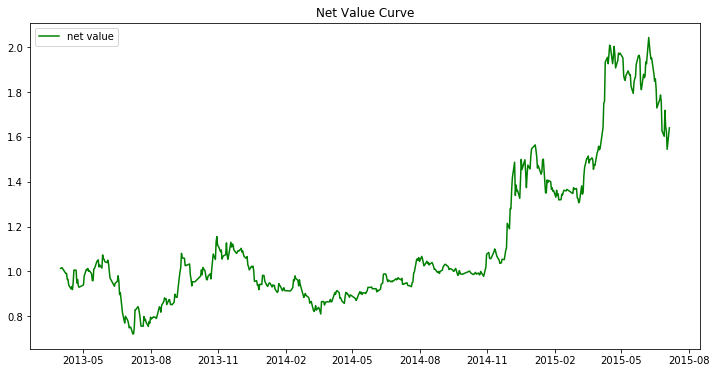

In [63]:
plt.figure(figsize=(12,6))
plt.plot(x, y, '-g')
plt.title('Net Value Curve')
plt.legend(['net value'])
plt.show()